In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
DATASET_PATH = '../datasets/dogs_vs_cats'
DATASET_TRAIN = DATASET_PATH + '/train/PetImages'
DATASET_TEST = DATASET_PATH + '/test'
IMG_SIZE = (128,128) #sizeing all images to 128x128 pixel
BATCH_SIZE = 32
EPOCHS = 20

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import numpy as np
import matplotlib.pyplot as plt

2025-04-02 20:41:29.225741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743606689.341269   14314 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743606689.374439   14314 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743606689.509759   14314 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743606689.509788   14314 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743606689.509791   14314 computation_placer.cc:177] computation placer alr

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_validation_data_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    zoom_range=0.2,
    validation_split=0.2
)

testing_data_gen=ImageDataGenerator(
    rescale=1./255
)

In [6]:
SEED = 42              # For reproducibility

# Load train (70%) set
train_ds=training_validation_data_gen.flow_from_directory(
    DATASET_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=SEED,
    shuffle=True
)

val_ds=training_validation_data_gen.flow_from_directory(
    DATASET_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=SEED,
    shuffle=True
)

test_ds=testing_data_gen.flow_from_directory(
    DATASET_TEST,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=SEED,
    shuffle=True
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3), name='conv_1'),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(64, (3,3), activation='relu', name='conv_2'),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 3
    Conv2D(128, (3,3), activation='relu', name='conv_3'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', name='conv_4'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer
    Dense(256, activation='relu'),

    # Output Layer (2 classes)
    Dense(1, activation='sigmoid') 
])

model.summary()

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743606693.568694   14314 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,225 (10.48 MB)

 Trainable params: 2,748,225 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('CatDogCNN.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
EPOCHS = 50
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = EPOCHS,
  callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1743606695.602955   14427 service.cc:152] XLA service 0x71db44005b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743606695.602972   14427 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-04-02 20:41:35.634459: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743606695.866618   14427 cuda_dnn.cc:529] Loaded cuDNN version 90800


  3/625 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.5625 - loss: 0.6935

I0000 00:00:1743606699.678841   14427 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/625 ━━━━━━━━━━━━━━━━━━━━ 48s 98ms/step - accuracy: 0.5252 - loss: 0.6925

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5224 - loss: 0.6915

/home/bismuth/projects/ML/models/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 124ms/step - accuracy: 0.5224 - loss: 0.6915 - val_accuracy: 0.5196 - val_loss: 0.6842 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5900 - loss: 0.6651

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.5901 - loss: 0.6651 - val_accuracy: 0.6295 - val_loss: 0.6379 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6722 - loss: 0.6052

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.6722 - loss: 0.6052 - val_accuracy: 0.7051 - val_loss: 0.5615 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7290 - loss: 0.5439

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.7290 - loss: 0.5439 - val_accuracy: 0.7637 - val_loss: 0.4889 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7535 - loss: 0.5025

625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.7535 - loss: 0.5025 - val_accuracy: 0.7771 - val_loss: 0.4634 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7720 - loss: 0.4720

625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.7720 - loss: 0.4720 - val_accuracy: 0.8017 - val_loss: 0.4361 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7962 - loss: 0.4366

625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 121ms/step - accuracy: 0.7962 - loss: 0.4366 - val_accuracy: 0.8263 - val_loss: 0.4043 - learning_rate: 0.0010
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8309 - loss: 0.3853

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8309 - loss: 0.3853 - val_accuracy: 0.8355 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8344 - loss: 0.3729

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8344 - loss: 0.3728 - val_accuracy: 0.8409 - val_loss: 0.3641 - learning_rate: 0.0010
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8518 - loss: 0.3355

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.8518 - loss: 0.3355 - val_accuracy: 0.8627 - val_loss: 0.3166 - learning_rate: 0.0010
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8610 - loss: 0.3162 - val_accuracy: 0.8495 - val_loss: 0.3325 - learning_rate: 0.0010
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8711 - loss: 0.2990 - val_accuracy: 0.8473 - val_loss: 0.3396 - learning_rate: 0.0010
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8755 - loss: 0.2894

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8755 - loss: 0.2894 - val_accuracy: 0.8681 - val_loss: 0.3057 - learning_rate: 0.0010
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8795 - loss: 0.2747

625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8795 - loss: 0.2747 - val_accuracy: 0.8830 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8905 - loss: 0.2576 - val_accuracy: 0.8675 - val_loss: 0.3108 - learning_rate: 0.0010
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.8945 - loss: 0.2445 - val_accuracy: 0.8852 - val_loss: 0.2776 - learning_rate: 0.0010
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.8961 - loss: 0.2454 - val_accuracy: 0.8798 - val_loss: 0.2809 - learning_rate: 0.0010
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9025 - loss: 0.2330

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9025 - loss: 0.2330 - val_accuracy: 0.8838 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 19/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9037 - loss: 0.2307

625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.9037 - loss: 0.2307 - val_accuracy: 0.8878 - val_loss: 0.2739 - learning_rate: 0.0010
Epoch 20/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9039 - loss: 0.2268

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9039 - loss: 0.2268 - val_accuracy: 0.8998 - val_loss: 0.2416 - learning_rate: 0.0010
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9084 - loss: 0.2103

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9084 - loss: 0.2103 - val_accuracy: 0.9018 - val_loss: 0.2312 - learning_rate: 0.0010
Epoch 22/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.9144 - loss: 0.2030 - val_accuracy: 0.8806 - val_loss: 0.2717 - learning_rate: 0.0010
Epoch 23/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9126 - loss: 0.2041 - val_accuracy: 0.8992 - val_loss: 0.2381 - learning_rate: 0.0010
Epoch 24/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9211 - loss: 0.1928 - val_accuracy: 0.9004 - val_loss: 0.2344 - learning_rate: 0.0010
Epoch 25/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9197 - loss: 0.1928

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9197 - loss: 0.1928 - val_accuracy: 0.9030 - val_loss: 0.2298 - learning_rate: 0.0010
Epoch 26/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9178 - loss: 0.1983

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9178 - loss: 0.1983 - val_accuracy: 0.9062 - val_loss: 0.2280 - learning_rate: 0.0010
Epoch 27/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.9265 - loss: 0.1761 - val_accuracy: 0.8960 - val_loss: 0.2577 - learning_rate: 0.0010
Epoch 28/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9234 - loss: 0.1793

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9234 - loss: 0.1793 - val_accuracy: 0.9056 - val_loss: 0.2207 - learning_rate: 0.0010
Epoch 29/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9305 - loss: 0.1765 - val_accuracy: 0.9142 - val_loss: 0.2216 - learning_rate: 0.0010
Epoch 30/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9250 - loss: 0.1838

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9250 - loss: 0.1838 - val_accuracy: 0.9084 - val_loss: 0.2192 - learning_rate: 0.0010
Epoch 31/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.9325 - loss: 0.1690 - val_accuracy: 0.9102 - val_loss: 0.2248 - learning_rate: 0.0010
Epoch 32/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9243 - loss: 0.1737 - val_accuracy: 0.9062 - val_loss: 0.2298 - learning_rate: 0.0010
Epoch 33/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9310 - loss: 0.1681 - val_accuracy: 0.9064 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 34/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9280 - loss: 0.1711 - val_accuracy: 0.9150 - val_loss: 0.2232 - learning_rate: 0.0010
Epoch 35/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9361 - loss: 0.1556 - val_accuracy: 0.9056 - val_loss: 0.2319 - learning_rate: 0.0010
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9328 -

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9312 - loss: 0.1597 - val_accuracy: 0.9158 - val_loss: 0.2152 - learning_rate: 0.0010
Epoch 38/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9337 - loss: 0.1572

625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.9337 - loss: 0.1572 - val_accuracy: 0.9166 - val_loss: 0.2085 - learning_rate: 0.0010
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9361 - loss: 0.1523

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9361 - loss: 0.1523 - val_accuracy: 0.9220 - val_loss: 0.2085 - learning_rate: 0.0010
Epoch 40/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9318 - loss: 0.1618 - val_accuracy: 0.9004 - val_loss: 0.2514 - learning_rate: 0.0010
Epoch 41/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9345 - loss: 0.1621 - val_accuracy: 0.9070 - val_loss: 0.2285 - learning_rate: 0.0010
Epoch 42/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9390 - loss: 0.1508 - val_accuracy: 0.9128 - val_loss: 0.2154 - learning_rate: 0.0010
Epoch 43/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9423 - loss: 0.1384

625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.9423 - loss: 0.1384 - val_accuracy: 0.9224 - val_loss: 0.2049 - learning_rate: 0.0010
Epoch 44/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.9416 - loss: 0.1452 - val_accuracy: 0.9156 - val_loss: 0.2105 - learning_rate: 0.0010
Epoch 45/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9388 - loss: 0.1491 - val_accuracy: 0.9024 - val_loss: 0.2430 - learning_rate: 0.0010
Epoch 46/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9402 - loss: 0.1478 - val_accuracy: 0.9148 - val_loss: 0.2152 - learning_rate: 0.0010
Epoch 47/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9424 - loss: 0.1391 - val_accuracy: 0.9198 - val_loss: 0.2146 - learning_rate: 0.0010
Epoch 48/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9417 - loss: 0.1466 - val_accuracy: 0.9182 - val_loss: 0.2090 - learning_rate: 0.0010
Epoch 49/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9421 -

In [10]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9643 - loss: 0.1180
Test Accuracy: 0.9680


Filters shape for conv_1: (3, 3, 3, 32)


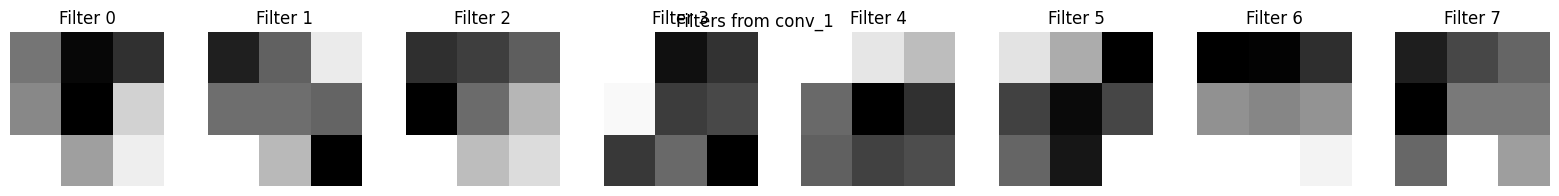

In [11]:
# Function to visualize filters
def visualize_filters(model, layer_name, num_filters=8):
    # Get the weights of the specified layer
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()  # Shape: (filter_height, filter_width, input_channels, num_filters)
    print(f"Filters shape for {layer_name}: {filters.shape}")

    # Normalize filter values to [0, 1] for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 2))
    for i in range(num_filters):
        if i < filters.shape[-1]:  # Ensure we don't exceed available filters
            # Extract the i-th filter (3x3x3 for RGB input in conv1)
            f = filters[:, :, :, i]
            # If RGB, average across channels or pick one channel (e.g., 0 for red)
            f = np.mean(f, axis=2) if f.shape[2] == 3 else f
            axes[i].imshow(f, cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(f'Filter {i}')
    plt.suptitle(f'Filters from {layer_name}')
    plt.show()

# Visualize filters from the first convolutional layer
visualize_filters(model, 'conv_1', num_filters=8)

# Optionally visualize filters from other layers
# visualize_filters(model, 'conv2', num_filters=8)
# visualize_filters(model, 'conv3', num_filters=8)

In [12]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'test_cat.jpg'  # Replace with the actual path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match your model's input

# Convert image to a NumPy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (if necessary)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

In [13]:
# Make the prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Prediction: Cat
